# Data Preprocessing

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
dataset =pd.read_csv('water_data.csv',encoding='unicode_escape')
dataset

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,NAN,7.9,738,7.2,2.7,0.518,0.518,202,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,29,7.5,585,6.3,2.6,0.155,0.155,315,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPUR,28,7.6,98,6.2,1.2,NAN,NAN,570,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPUR,28,7.7,91,6.5,1.3,NAN,NAN,562,2003


## Data Visualization and Missing Values

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

#### Convert to numeric

In [4]:
dataset.iloc[:,3:]=dataset.iloc[:,3:].applymap(lambda x: pd.to_numeric(x,errors= "coerce"))
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   STATION CODE                      1991 non-null   object 
 1   LOCATIONS                         1991 non-null   object 
 2   STATE                             1991 non-null   object 
 3   Temp                              1899 non-null   float64
 4   D.O. (mg/l)                       1960 non-null   float64
 5   PH                                1983 non-null   float64
 6   CONDUCTIVITY (µmhos/cm)           1966 non-null   float64
 7   B.O.D. (mg/l)                     1948 non-null   float64
 8   NITRATENAN N+ NITRITENANN (mg/l)  1766 non-null   float64
 9   FECAL COLIFORM (MPN/100ml)        1675 non-null   float64
 10  TOTAL COLIFORM (MPN/100ml)Mean    1859 non-null   float64
 11  year                              1991 non-null   int64  
dtypes: flo

#### Drop Columns

In [5]:
dataset.drop(['STATE','STATION CODE',"LOCATIONS","TOTAL COLIFORM (MPN/100ml)Mean"],axis=1,inplace=True)

#### Check for Null Values

In [6]:
print(dataset.isnull().any())

Temp                                 True
D.O. (mg/l)                          True
PH                                   True
CONDUCTIVITY (µmhos/cm)              True
B.O.D. (mg/l)                        True
NITRATENAN N+ NITRITENANN (mg/l)     True
FECAL COLIFORM (MPN/100ml)           True
year                                False
dtype: bool


#### Removing Outliners

In [7]:
dataset.describe()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),year
count,1899.000000,1960.000000,1983.000000,1966.000000,1948.000000,1766.000000,1.675000e+03,1991.000000
mean,26.209814,6.392637,112.090674,1786.466394,6.940049,1.623079,3.625294e+05,2010.038172
std,3.366388,1.332938,1878.930716,5552.276223,29.400026,4.090481,8.764767e+06,3.057333
min,10.000000,0.000000,0.000000,0.400000,0.100000,0.000000,0.000000e+00,2003.000000
25%,24.750000,5.900000,6.900000,78.000000,1.200000,0.240000,2.600000e+01,2008.000000
50%,27.000000,6.700000,7.300000,183.000000,1.896500,0.516000,2.210000e+02,2011.000000
75%,28.400000,7.200000,7.700000,592.750000,3.600000,1.500000,9.965000e+02,2013.000000
max,35.000000,11.400000,67115.000000,65700.000000,534.500000,108.700000,2.725216e+08,2014.000000


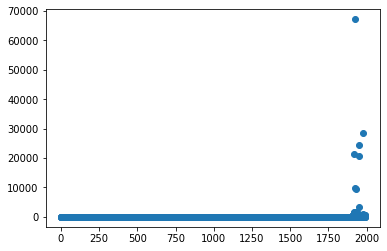

In [8]:
plt.scatter(range(1991),dataset["PH"])

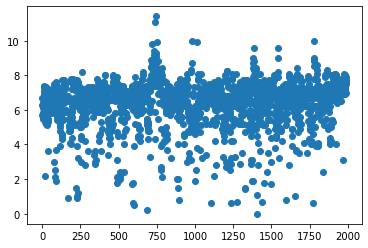

In [9]:
plt.scatter(range(1991),dataset["D.O. (mg/l)"])

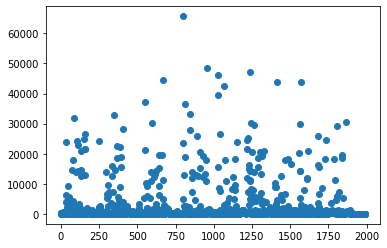

In [10]:
plt.scatter(range(1991),dataset["CONDUCTIVITY (µmhos/cm)"])

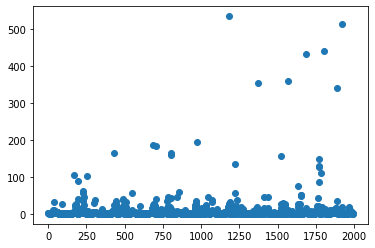

In [11]:
plt.scatter(range(1991),dataset["B.O.D. (mg/l)"])

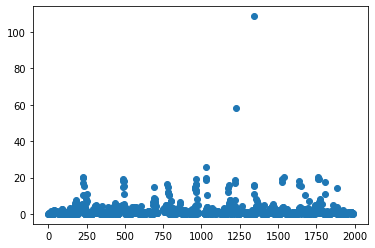

In [12]:
plt.scatter(range(1991),dataset["NITRATENAN N+ NITRITENANN (mg/l)"])

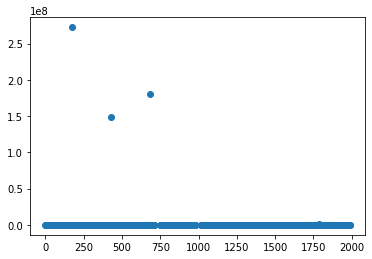

In [13]:
plt.scatter(range(1991),dataset["FECAL COLIFORM (MPN/100ml)"])

In [14]:
dataset=dataset[dataset["PH"]<14]
dataset=dataset[dataset["PH"]>4]
dataset=dataset[dataset["B.O.D. (mg/l)"]<190]
dataset=dataset[dataset["FECAL COLIFORM (MPN/100ml)"]<1000000000]

In [15]:
print(dataset.info())
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 1 to 1900
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Temp                              1550 non-null   float64
 1   D.O. (mg/l)                       1594 non-null   float64
 2   PH                                1596 non-null   float64
 3   CONDUCTIVITY (µmhos/cm)           1594 non-null   float64
 4   B.O.D. (mg/l)                     1596 non-null   float64
 5   NITRATENAN N+ NITRITENANN (mg/l)  1563 non-null   float64
 6   FECAL COLIFORM (MPN/100ml)        1596 non-null   float64
 7   year                              1596 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 112.2 KB
None


,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),year
count,1550.000000,1594.000000,1596.000000,1594.000000,1596.000000,1563.000000,1.596000e+03,1596.000000
mean,26.321120,6.321489,7.210962,1840.548701,4.570059,1.391031,3.797053e+05,2010.441103
std,3.263076,1.285105,0.503566,5339.636857,10.977493,2.809978,8.978805e+06,2.716658
min,10.000000,0.000000,5.600000,11.000000,0.100000,0.000000,0.000000e+00,2005.000000
25%,25.000000,5.900000,6.900000,79.000000,1.100000,0.250000,3.400000e+01,2008.000000
50%,27.000000,6.700000,7.200000,180.500000,1.700000,0.500000,2.360000e+02,2011.000000
75%,28.400000,7.100000,7.600000,611.250000,3.400000,1.406000,1.082750e+03,2013.000000
max,35.000000,10.000000,9.010000,47156.000000,185.800000,58.100000,2.725216e+08,2014.000000


#### Fill NaN

In [16]:
dataset['Temp']=dataset['Temp'].replace(np.NaN,dataset['Temp'].mean())#26.318446
dataset['D.O. (mg/l)']=dataset['D.O. (mg/l)'].replace(np.NaN,dataset['D.O. (mg/l)'].mean())
dataset['CONDUCTIVITY (µmhos/cm)']=dataset['CONDUCTIVITY (µmhos/cm)'].replace(np.NaN,dataset['CONDUCTIVITY (µmhos/cm)'].mean())
dataset['NITRATENAN N+ NITRITENANN (mg/l)']=dataset['NITRATENAN N+ NITRITENANN (mg/l)'].replace(np.NaN,dataset['NITRATENAN N+ NITRITENANN (mg/l)'].mean())
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 1 to 1900
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Temp                              1596 non-null   float64
 1   D.O. (mg/l)                       1596 non-null   float64
 2   PH                                1596 non-null   float64
 3   CONDUCTIVITY (µmhos/cm)           1596 non-null   float64
 4   B.O.D. (mg/l)                     1596 non-null   float64
 5   NITRATENAN N+ NITRITENANN (mg/l)  1596 non-null   float64
 6   FECAL COLIFORM (MPN/100ml)        1596 non-null   float64
 7   year                              1596 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 112.2 KB


#### Organize Dataset

In [17]:
df=dataset.groupby(by=["year"],sort=True,as_index=True).mean()
df

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml)
year,,,,,,,
2005,26.543929,6.458511,7.244787,1792.402128,3.940489,0.733937,1.918894e+03
2006,25.047139,6.443528,7.227909,1544.775553,4.118500,0.994501,3.184227e+03
2007,26.204301,6.466667,7.149462,2237.419355,3.040860,0.821809,6.136817e+03
2008,26.788321,6.088321,7.070073,1504.569343,4.265766,1.104490,5.323146e+03
2009,27.264151,6.223742,7.150440,3535.513703,4.636478,1.471995,1.344756e+03
2010,26.683836,6.426362,7.119560,1664.389937,4.538805,1.173485,1.558840e+03
2011,26.830233,6.389535,7.275000,2172.546512,4.900000,1.536808,1.333326e+03
2012,25.953586,6.352321,7.279325,1396.464135,5.073840,1.594190,7.620333e+05
2013,26.037288,6.312288,7.258898,1529.766949,4.661441,1.774788,6.340517e+05


In [18]:
df.describe()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml)
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,26.320754,6.337802,7.201346,1885.492454,4.410604,1.280872,2.653627e+05
std,0.634017,0.126334,0.072999,648.079027,0.603959,0.362440,4.482261e+05
min,25.047139,6.088321,7.070073,1396.464135,3.040860,0.733937,1.333326e+03
25%,25.974512,6.245879,7.149707,1510.868745,4.155317,1.021998,1.648853e+03
50%,26.374115,6.370928,7.232959,1604.582745,4.587642,1.322740,4.253687e+03
75%,26.762200,6.439237,7.255371,2077.510416,4.840360,1.579845,4.770730e+05
max,27.264151,6.466667,7.279325,3535.513703,5.073840,1.774788,1.236742e+06


In [19]:
y=pd.Series()
yy=pd.DataFrame()

D:\NAVYA\Bunny\apps\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [20]:
y=df["PH"].apply(lambda x: (0 if (8>=x>=7)
                      else (0.028 if (8.5>=x>=8) or (7>=x>=6.5)
                      else (0.084 if (9>=x>=8.8) or (6.5>=x>=6.3)
                      else (0.112 if (10>=x>=9)  or (6.3>=x>=6)
                      else  0.14)))))
yy["PH"]=df["PH"].apply(lambda x: (0 if (8>=x>=7)
                      else (0.028 if (8.5>=x>=8) or (7>=x>=6.5)
                      else (0.084 if (9>=x>=8.8) or (6.5>=x>=6.3)
                      else (0.112 if (10>=x>=9)  or (6.3>=x>=6)
                      else  0.14)))))

In [21]:
yy["D.O. (mg/l)"]=df["D.O. (mg/l)"].apply(lambda x: (0 if (8>=x>=6.5)
                                 else (0.04 if (6.5>=x>=6)
                                 else  0.2)))
y=y+yy["D.O. (mg/l)"]

In [22]:
yy["CONDUCTIVITY (µmhos/cm)"]=df["CONDUCTIVITY (µmhos/cm)"].apply(lambda x: (0 if (1500>=x>=50)
                                             else (0.012 if (2000>=x>=1500)
                                             else (0.048 if (2500>=x>=2000)
                                             else  0.06))))
y=y+yy["CONDUCTIVITY (µmhos/cm)"]

In [23]:
yy["NITRATENAN N+ NITRITENANN (mg/l)"]=df["NITRATENAN N+ NITRITENANN (mg/l)"].apply(lambda x: (0 if (1>=x)
                                           else (0.036 if (1.5>=x>=1)
                                           else (0.144 if (2>=x>=1.5)
                                           else  0.18))))
y=y+yy["NITRATENAN N+ NITRITENANN (mg/l)"]

In [24]:
yy["B.O.D. (mg/l)"]=df["B.O.D. (mg/l)"].apply(lambda x: (0 if (3>=x>=0)
                              else (0.024 if (5>=x>=3)
                              else (0.072 if (10>=x>=5)
                              else  0.12))))
y=y+yy["B.O.D. (mg/l)"]

In [25]:
yy["FECAL COLIFORM (MPN/100ml)"]=df["FECAL COLIFORM (MPN/100ml)"].apply(lambda x: (0 if (5000>=x>=0)
                                     else (0.04 if (10000>=x>=5000)
                                     else (0.12 if (100000>=x>=10000)
                                     else  0.2))))
y=y+yy["FECAL COLIFORM (MPN/100ml)"]

In [26]:
y=y*100
yy["y"]=y

In [27]:
yy

,PH,D.O. (mg/l),CONDUCTIVITY (µmhos/cm),NITRATENAN N+ NITRITENANN (mg/l),B.O.D. (mg/l),FECAL COLIFORM (MPN/100ml),y
year,,,,,,,
2005,0,0.04,0.012,0.000,0.024,0.00,7.6
2006,0,0.04,0.012,0.000,0.024,0.00,7.6
2007,0,0.04,0.048,0.000,0.024,0.04,15.2
2008,0,0.04,0.012,0.036,0.024,0.04,15.2
2009,0,0.04,0.060,0.036,0.024,0.00,16.0
2010,0,0.04,0.012,0.036,0.024,0.00,11.2
2011,0,0.04,0.048,0.144,0.024,0.00,25.6
2012,0,0.04,0.000,0.144,0.072,0.20,45.6
2013,0,0.04,0.012,0.144,0.024,0.20,42.0


In [28]:
x=df.index.tolist()

In [29]:
x=list(map(lambda z:[z,],x))

In [39]:
x

[[2005],
 [2006],
 [2007],
 [2008],
 [2009],
 [2010],
 [2011],
 [2012],
 [2013],
 [2014]]

In [38]:
y=list(y)

In [40]:
y

[7.600000000000001,
 7.600000000000001,
 15.2,
 15.2,
 16.0,
 11.2,
 25.6,
 45.6,
 42.00000000000001,
 40.800000000000004]

#### Splitting Data

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Model Training

In [32]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predicting for Test Data

In [33]:
y_pre=lr.predict(x_test)
y_pre

array([11.11624266, 36.59099804])

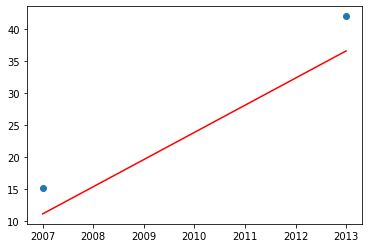

In [34]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pre,"r")

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pre) 

0.8720918462618956

In [36]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pre)

22.967188085214037

In [37]:
from joblib import dump
dump(lr,'model.save')

['model.save']